<Axes: xlabel='id'>

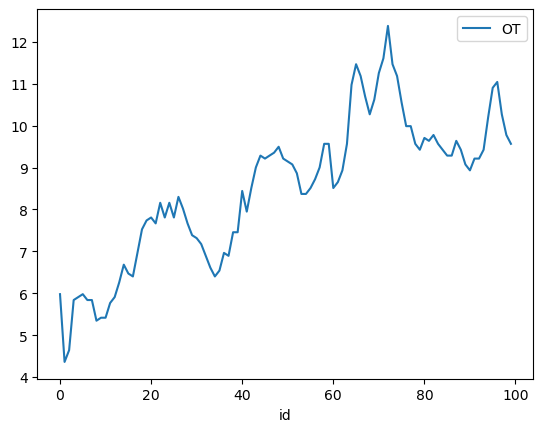

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

etth1 = pd.read_csv("ETTh1/ETTh1.csv")
ot_val = etth1["OT"].values[-100:]
csv_file = pd.DataFrame({'id': range(100), 'OT': ot_val})
csv_file.to_csv('OT_values.csv', index=False)

csv_file.plot("id")


In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Lecture du fichier CSV
data = pd.read_csv("ETTh1_without_missing.csv")

# Sélection des caractéristiques nécessaires pour l'entraînement
OT_values = data["OT"].values

# Fonction pour créer les séquences de données
def create_sequences(values, sequence_length):
    X, y = [], []
    for i in range(len(values) - sequence_length - 100):
        X.append(values[i:i + sequence_length])
        y.append(values[i + sequence_length:i + sequence_length + 100])
    return np.array(X), np.array(y)

# Longueur de la séquence
SEQUENCE_LENGTH = 100

# Création des séquences pour l'entraînement du modèle
X_train, y_train = create_sequences(OT_values, SEQUENCE_LENGTH)

# # Création du modèle LSTM avec TensorFlow
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(128, input_shape=(SEQUENCE_LENGTH, 1)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100)  # Un seul neurone de sortie pour prédire la valeur suivante
# ])

import math
mae = math.inf
while(mae > 0.63):

    # model = tf.keras.Sequential([
    #     tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQUENCE_LENGTH, 1)),
    #     tf.keras.layers.MaxPooling1D(pool_size=2),
    #     tf.keras.layers.LSTM(128, return_sequences=True),
    #     tf.keras.layers.Dropout(0.2),
    #     tf.keras.layers.LSTM(64),
    #     tf.keras.layers.Dropout(0.2),
    #     tf.keras.layers.Dense(100, activation='relu'),
    #     # tf.keras.layers.Dense(100)  # Neurone de sortie pour prédire la valeur suivante
    # ])

    # Définir votre modèle
    model = tf.keras.models.Sequential()
    # Ajouter des couches au modèle
    model.add(tf.keras.layers.Dense(64, input_dim=1, activation='relu'))  # Couche d'entrée avec activation ReLU
    model.add(tf.keraslayers.Dense(32, activation='relu'))  # Couche cachée avec activation ReLU
    model.add(tf.keras.layers.Dense(1, activation='linear'))  # Couche de sortie avec activation identité (linear)

    # Compilation du modèle
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])

    # Entraînement du modèle
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Prédiction des 100 valeurs suivantes
    last_sequence = OT_values[-SEQUENCE_LENGTH:].reshape(1, SEQUENCE_LENGTH, 1)
    predicted_values = model.predict(last_sequence).reshape(-1)

    # Sélection des 100 premières valeurs prédites disponibles
    num_predicted_values = min(len(predicted_values), 100)
    predicted_df = pd.DataFrame({'id': range(num_predicted_values), 'OT': predicted_values[:num_predicted_values]})

    # Écriture dans un nouveau fichier CSV
    predicted_df.to_csv('OT_predictions.csv', index=False)

    # Calcul du mae
    mae = np.mean(np.abs(csv_file['OT'] - predicted_df['OT']))

    print("MAE: ", mae)


Epoch 1/10
535/535 [==============================] - 29s 46ms/step - loss: 91.0276 - mae: 6.8374
Epoch 2/10
535/535 [==============================] - 26s 48ms/step - loss: 27.2893 - mae: 3.5477
Epoch 3/10
535/535 [==============================] - 28s 51ms/step - loss: 19.6645 - mae: 3.1142
Epoch 4/10
535/535 [==============================] - 27s 51ms/step - loss: 16.2870 - mae: 2.9011
Epoch 5/10
535/535 [==============================] - 27s 51ms/step - loss: 15.3054 - mae: 2.8470
Epoch 6/10
535/535 [==============================] - 26s 48ms/step - loss: 14.7305 - mae: 2.7901
Epoch 7/10
535/535 [==============================] - 25s 48ms/step - loss: 14.4984 - mae: 2.7651
Epoch 8/10
535/535 [==============================] - 27s 50ms/step - loss: 14.0482 - mae: 2.7222
Epoch 9/10
535/535 [==============================] - 25s 47ms/step - loss: 11.4878 - mae: 2.5844
Epoch 10/10
1/1 [==============================] - 1s 934ms/step
MAE:  0.9078504133224488
Epoch 1/10
535/535 [========

MAE:  0.9156371021270755


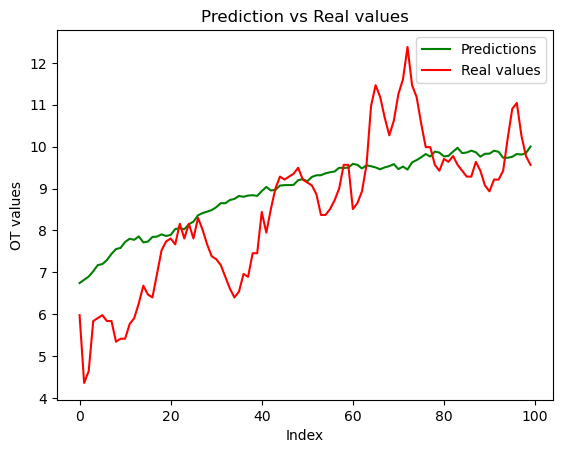

In [ ]:
# Tracer les prédictions
plt.plot(predicted_df['id'], predicted_df['OT'], color='g', label='Predictions')

# Tracer les données CSV
plt.plot(csv_file['id'], csv_file['OT'], color='r', label='Real values')

# Ajouter les titres et les légendes
plt.title('Prediction vs Real values')
plt.xlabel('Index')
plt.ylabel('OT values')
plt.legend()

